In [1]:
import w_risk_kit as wrk
import pandas as pd

import yfinance as yf

## 1. Data Curation

In [2]:
securityId = yf.Ticker('AAPL')
securityShortName = securityId.get_info()['shortName']

In [3]:
securityPrices = pd.DataFrame(securityId.history(start='1990-12-31', end='2022-12-31')['Close'].rename(securityShortName))
securityPrices

,Apple Inc.
Date,
1990-12-31,0.310973
1991-01-02,0.314589
1991-01-03,0.310973
1991-01-04,0.312781
1991-01-07,0.312781
...,...
2022-01-31,174.557602
2022-02-01,174.387817
2022-02-02,175.616257


## 2. Feature Creation

In [4]:
securityDailyReturns = securityPrices.pct_change().dropna()
securityMonthlyReturns = (securityDailyReturns+1).groupby(pd.Grouper(freq='M')).prod()-1

In [12]:
wrk.std_distr_analysis(securityMonthlyReturns,12,0.02)

,Apple Inc.
Annualized Return,0.224718
Annualized Volatility,0.425737
Skewness,-0.259448
Kurtosis,4.784029
Is Normal,False
Sharpe Ratio,0.471802
Gaussian VaR (95%),0.177038
Cornish-Fisher VaR (95%),0.181516
Monthly Historic VaR (95%),0.159115
Monthly Historic CVaR (95%),0.252929


<AxesSubplot:xlabel='Date'>

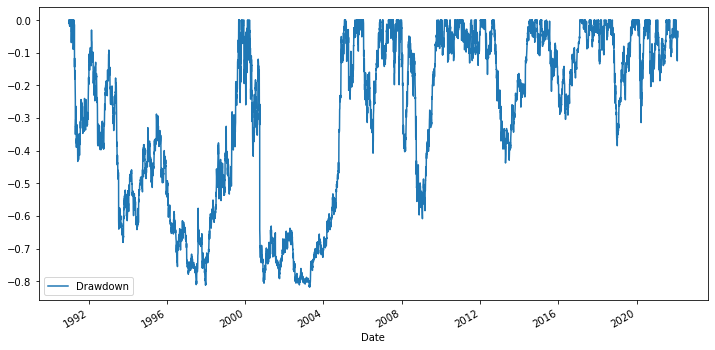

In [6]:
wrk.drawdown(securityDailyReturns[securityShortName])[['Drawdown']].plot(figsize=(12,6))

## 3. Strategy Analysis

<AxesSubplot:title={'center':'Moving Averages'}, xlabel='Date'>

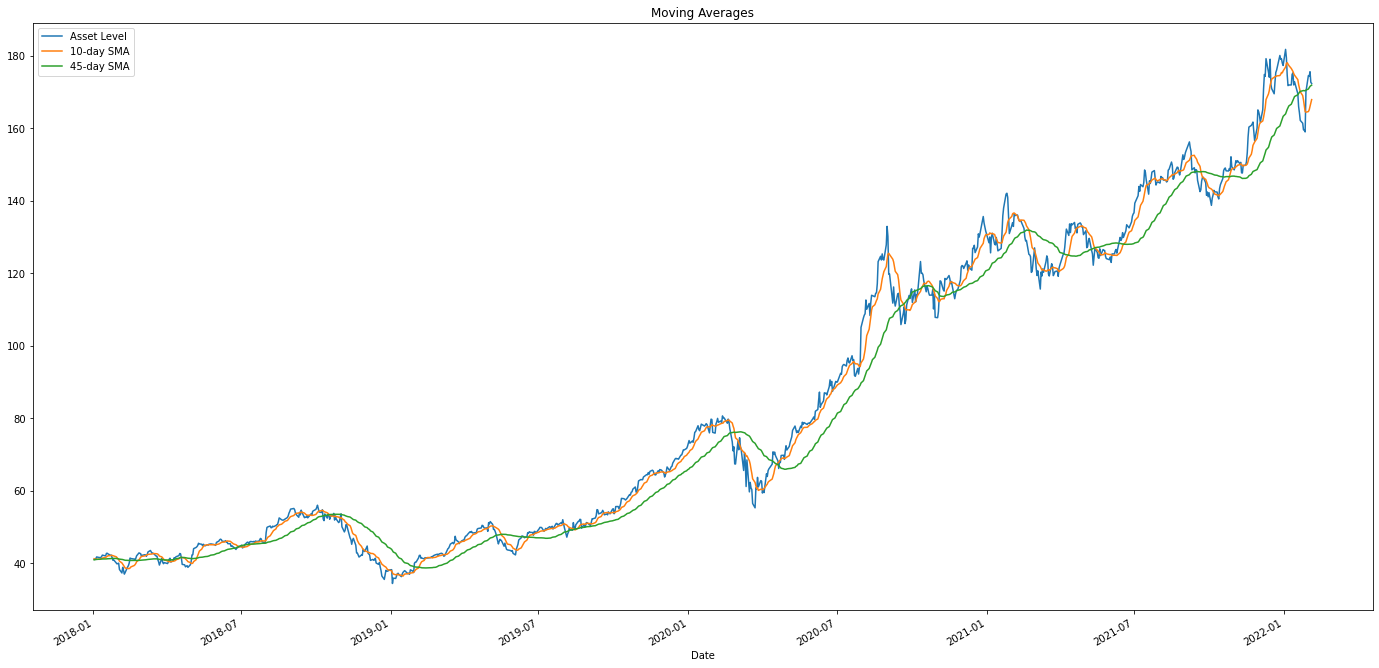

In [7]:
trendAnalysis = wrk.trend_info(securityPrices[securityShortName])
trendAnalysis[['Asset Level','10-day SMA','45-day SMA']]['2018':].plot(figsize=(24,12),title="Moving Averages")

<AxesSubplot:title={'center':'Trade Signal (-1:Short, 1:Long)'}, xlabel='Date'>

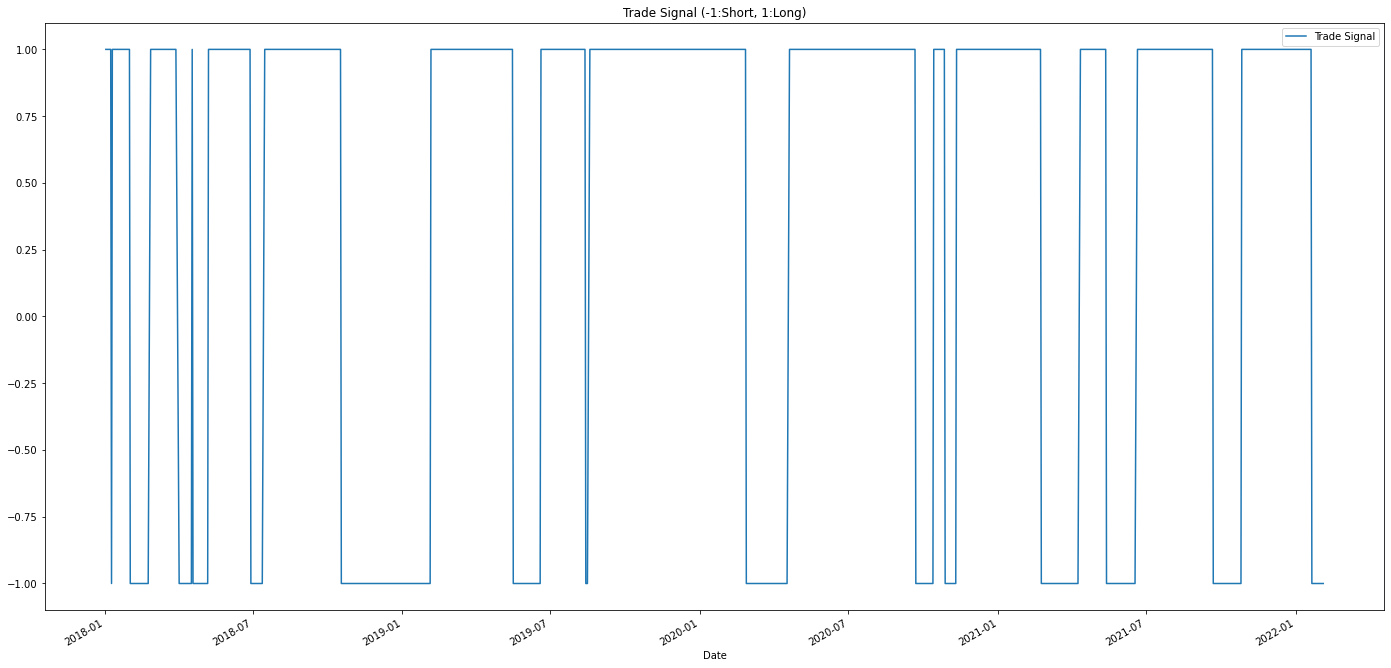

In [8]:
trendAnalysis[['Trade Signal']]['2018':].plot(figsize=(24,12),title="Trade Signal (-1:Short, 1:Long)")

## 4. Backtesting

In [9]:
trendStratMthReturns = wrk.calc_mth_returns(securityPrices.aggregate(lambda col: wrk.trend_info(col)['Strategy Returns']))

In [10]:
wrk.std_distr_analysis(trendStratMthReturns,12,0.02)

,Apple Inc.
Annualized Return,0.244941
Annualized Volatility,0.371987
Skewness,0.271627
Kurtosis,3.825948
Is Normal,False
Sharpe Ratio,0.593557
Gaussian VaR (95%),0.152359
Cornish-Fisher VaR (95%),0.142143
Monthly Historic VaR (95%),0.133431
Monthly Historic CVaR (95%),0.189771


array([[<AxesSubplot:title={'center':'Apple Inc.'}>]], dtype=object)

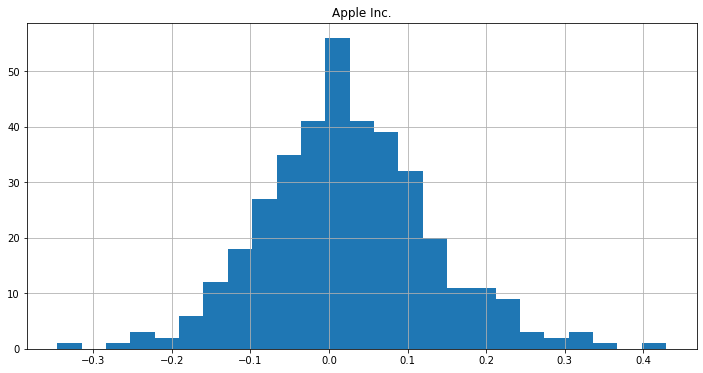

In [11]:
trendStratMthReturns.hist(bins=25, figsize=(12,6))

## 5. Portfolio Construction